<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import time

import sys
sys.path.append('../metrics/')
import metrics
import importlib

plt.rcParams['font.family']=['Songti SC']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.max_rows = 200
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=100, suppress=True)   # 打印numpy时设置显示宽度，并且不用科学计数法显示

这个文件是用来测试sklearn.svm中的SVC的linear核和rbf核在recall, precision, ks上的区别


In [2]:
def test_SVC(df,X,y,kernel,THRESHOLD):
    """测试sklearn.svm中的SVC
    
    这部分使用sklearn的SVM，并可调整预测的概率值用于分类时的阈值（不调整情况下的官方默认实现是0.5），
    计算量模型得分recall、precision和ks，并绘制ks曲线
        
    """
    start = time.time()
    clf = SVC(gamma='auto',random_state=1, probability=True,kernel=kernel)
    clf.fit(X,y)
    y_predict = (clf.predict_proba(X)[:,1] >= THRESHOLD).astype(int)#自己设定阈值，Label=1的概率>=0.4就判为1
    end = time.time()
    print(f"{kernel} time: {end - start} s")
    dff = df.drop(df.columns[[0,1]], axis=1)
    dff.insert(0, 'y_predict', y_predict)
    dff.insert(0, 'y', df["Label"])
    dff.insert(0, 'prob_predict', clf.predict_proba(X)[:,1])
    recall, precision = metrics.recall_and_precision(dff,metrics.metricStruct(0,1))
    ks = metrics.plot_ks_curve(dff,metrics.metricStruct(0,1))
    print(f"recall: {recall}, \nprecision: {precision}, \nks: {ks}")
    return clf, recall, precision, ks, end - start, dff

In [3]:
def get_table1d(t, j):
    linear = []
    rbf = []
    for i in range(len(t)):
        if i%2 == 0:
            linear.append(t[i][j])
        else:
            rbf.append(t[i][j])
    return linear, rbf

In [4]:
def get_table2d(t):
    linear = []
    rbf = []
    for i in [1,2,3,4]: #依次是recall, precision, ks, end - start
        linear_i,rbf_i = get_table1d(t, i)
        linear.append(linear_i)
        rbf.append(rbf_i)
    return linear,rbf
    

In [5]:
def plot_score(t,type,h=1):
    """绘制在不同阈值和内核下的得分柱状图"""
    linear, rbf = get_table2d(t)
    if type == "Recall":
        x = 0
    elif type == "Precision":
        x = 1
    elif type == "KS":
        x = 2
    elif type == "Time(s)":
        x = 3
    
    labels = ['0.4', '0.5', '0.55']
    linear_score = [linear[x][0], linear[x][1], linear[x][2]]
    rbf_score = [rbf[x][0], rbf[x][1], rbf[x][2]]
    
    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, linear_score, width, label='linear')
    rects2 = ax.bar(x + width/2, rbf_score, width, label='rbf')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(f"{type}")
    ax.set_xlabel("Threshold")
    ax.set_title(f'{type} by threshold and kernel')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.set_ylim([0, h])
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    autolabel(rects1)
    autolabel(rects2)
    plt.show()

两个类别0、1，设置不同的阈值和内核进行试验

linear time: 0.18606185913085938 s
recall: 0.7307692307692307, 
precision: 0.6480218281036835, 
ks: 0.40752271350696545
rbf time: 0.1914370059967041 s
recall: 0.8015384615384615, 
precision: 0.9489981785063752, 
ks: 0.7771895820714718


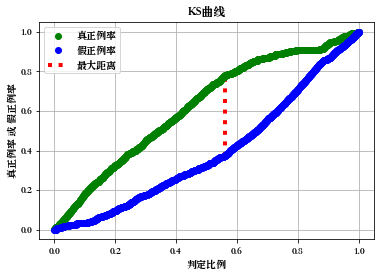

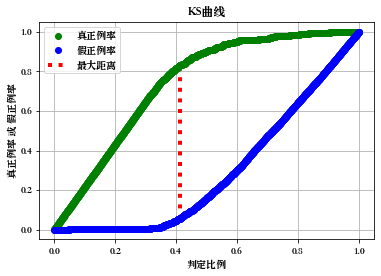

In [6]:
if __name__ == '__main__':
    df = pd.read_csv("../data/preprocess.csv")
    X,y = df.drop(df.columns[[0,1]], axis=1), df["Label"]
    t = []
    
    # 计算阈值=0.4时，即预测的概率大于0.4就将类别判为1时，linear核与rbf核的效果
    t.append(test_SVC(df,X,y,"linear",0.4))
    t.append(test_SVC(df,X,y,"rbf",0.4))

linear time: 0.19176411628723145 s
recall: 0.7307692307692307, 
precision: 0.6480218281036835, 
ks: 0.40752271350696545
rbf time: 0.18494820594787598 s
recall: 0.78, 
precision: 0.9620493358633776, 
ks: 0.7771895820714718


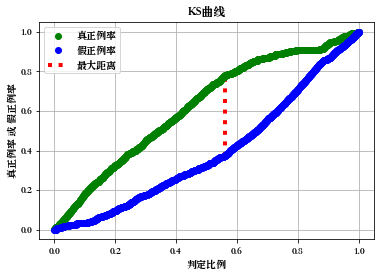

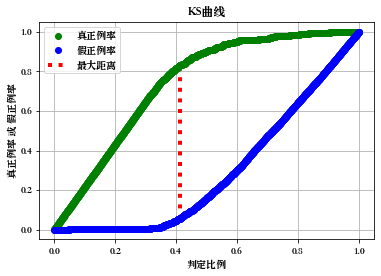

In [7]:
    # 计算阈值=0.5时，即预测的概率大于0.5就将类别判为1时，linear核与rbf核的效果
    
    t.append(test_SVC(df,X,y,"linear",0.5))
    t.append(test_SVC(df,X,y,"rbf",0.5))

linear time: 0.17933988571166992 s
recall: 0.7307692307692307, 
precision: 0.6480218281036835, 
ks: 0.40752271350696545
rbf time: 0.19043612480163574 s
recall: 0.7646153846153846, 
precision: 0.9631782945736435, 
ks: 0.7771895820714718


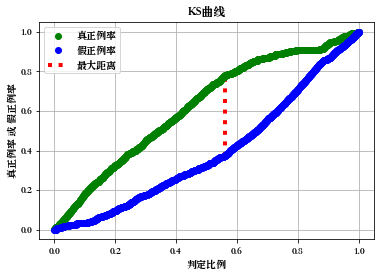

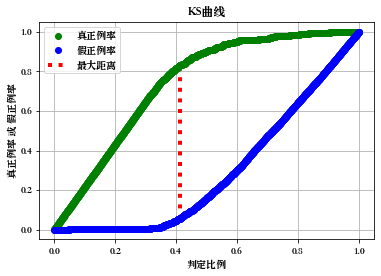

In [8]:
    # 计算阈值=0.55时，即预测的概率大于0.55就将类别判为1时，linear核与rbf核的效果
    t.append(test_SVC(df,X,y,"linear",0.55))
    t.append(test_SVC(df,X,y,"rbf",0.55))

下图是将各个指标得分进行比较：
- recall：rbf和linear核得分都在0.75左右，但rbf核得分稍微更高些  
不同阈值对linear核得分几乎没有影响，但是rbf的低阈值得分更高
- precision：rbf核的得分比linear核的高得多，高于0.9  
不同阈值对linear核得分几乎没有影响，但是rbf的高阈值得分更高
- KS：rbf核的得分比linear核的高得多，0.77  
不同阈值对rbf和linear核得分几乎没有影响
- time：不同阈值、不同内核时间都接近0.2s

总之，根据precision和KS的显著得分差异，我们觉得rbf核在这个数据集上分类效果好。  
rbf核下，低阈值的recall值更高，高阈值的precision值更高

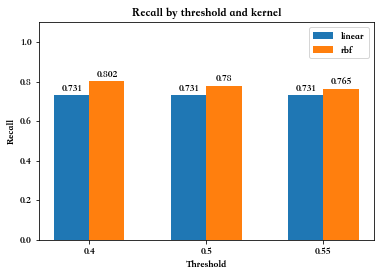

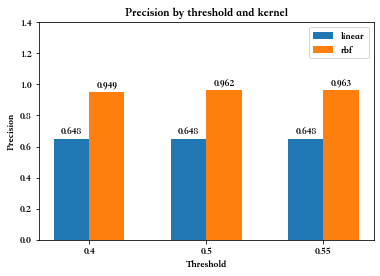

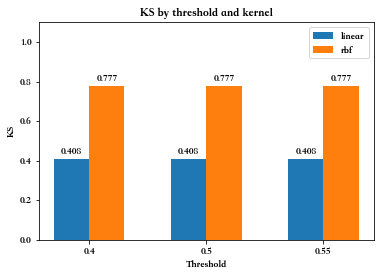

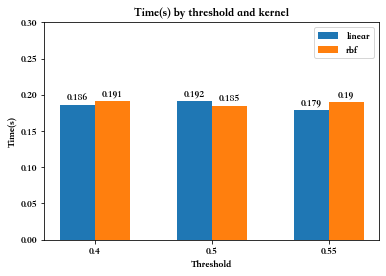

In [9]:
    plot_score(t,"Recall",1.1)
    plot_score(t,"Precision",1.4)
    plot_score(t,"KS",1.1)
    plot_score(t,"Time(s)",0.3)